<a href="https://colab.research.google.com/github/ricsajr/Classification_behind_the_scenes/blob/main/conecta_ia_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['Camiseta', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

print("Shape dos dados de treinamento:", train_images.shape)
print("Quantidade de dados de treinamento:", len(train_labels))
print("Labels únicos:", np.unique(train_labels))

4422102/4422102 [==============================] - 0s 0us/step
Shape dos dados de treinamento: (60000, 28, 28)
Quantidade de dados de treinamento: 60000
Labels únicos: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['Camiseta', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

print("Shape dos dados de treinamento:", train_images.shape)
print("Quantidade de dados de treinamento:", len(train_labels))
print("Labels únicos:", np.unique(train_labels))

Shape dos dados de treinamento: (60000, 28, 28)
Quantidade de dados de treinamento: 60000
Labels únicos: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nAcurácia no conjunto de testes:', test_acc)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5019 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3745 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3389 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3130 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2949 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2489 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2414 - accurac

313/313 [==============================] - 1s 3ms/step


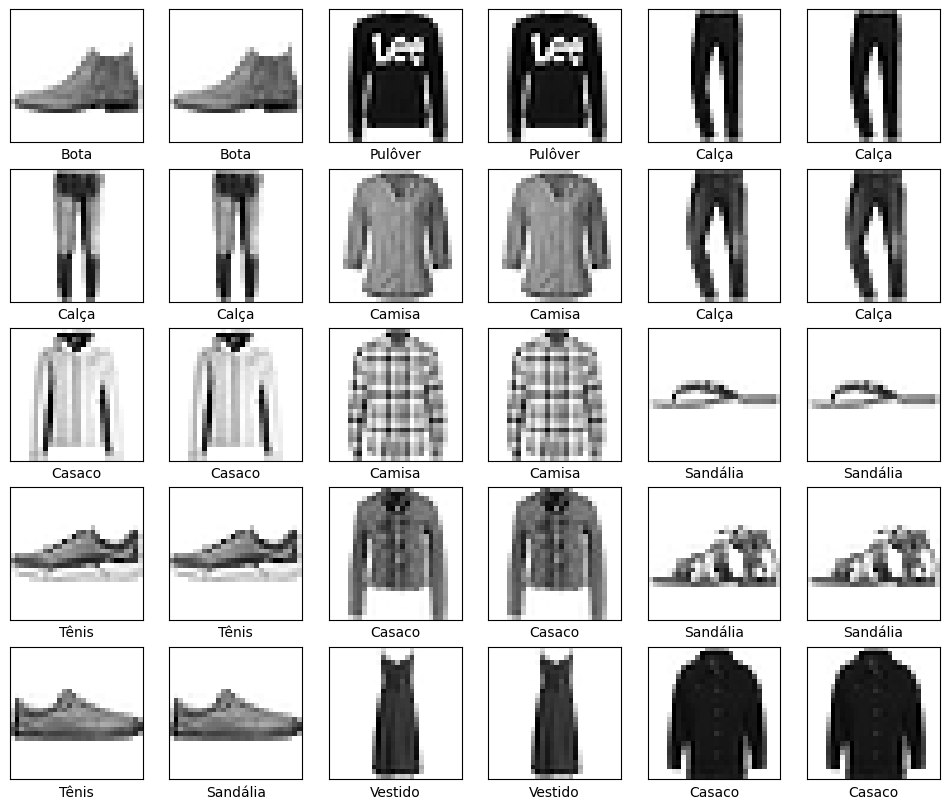

In [ ]:
predictions = model.predict(test_images)

# Exibir algumas imagens de teste com as previsões correspondentes
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions[i])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[predicted_label])
plt.show()
